In [1]:
from finches import Mpipi_frontend, CALVADOS_frontend
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

from tqdm import tqdm

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# Read in tile and activity data
seq_data = pd.read_csv("/Users/claireleblanc/Downloads/Gcn4OrthologData_ToShare_20240930.csv", index_col=0)
seq_data

,ADseq,Name,ArrayDNA,Activity_BioRepA_BYS4,Activity_BioRepB_BYS4,TotalReads_BioRepA_BYS4,TotalReads_BioRepB_BYS4,BioRep_A_GFP_TotalReads,BioRep_A_GFP,BioRep_B_GFP_TotalReads,...,F.D,F..D,MF.Y..L,M..Y..L,SP,[WFYL]...[WFYL][WFYL],WFL,WFYLM,WF,TotalReads_SCglucose
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_1,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,62100.529409,39598.983661,1098.0,2857.0,NaN,NaN,NaN,...,0,0,0,0,0,0,4,7,1,3955.0
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_6,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,NaN,22153.464394,NaN,43534.0,NaN,NaN,1246.0,...,0,0,0,0,0,0,3,6,1,NaN
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_11,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,35362.047143,16461.733704,90903.0,3102.0,1797.0,530.633638,NaN,...,0,0,0,0,0,0,4,6,2,94005.0
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_16,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,34961.675584,9931.871718,204600.0,226.0,3974.0,709.844542,NaN,...,0,0,0,0,0,0,5,7,2,204826.0
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_21,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,55288.447568,47714.348847,1128.0,43923.0,NaN,NaN,906.0,...,0,0,0,0,0,0,5,7,2,45051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,Gnc4Lib_Kappa_HIGH_0,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...,261745.694159,261913.808975,22275.0,53393.0,2685.0,8782.000000,5662.0,...,0,0,0,0,0,0,6,8,3,75668.0
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,Gnc4Lib_Disorder_HIGH_0,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,261606.121575,261215.289071,3225.0,23456.0,414.0,8782.000000,2446.0,...,0,1,0,0,0,0,6,10,4,26681.0
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,Gnc4Lib_Disorder_HIGH_0,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,158954.046399,146643.694216,64713.0,46036.0,10295.0,4506.455793,8034.0,...,0,1,0,0,0,0,6,9,3,110749.0
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,Gnc4Lib_Charge_HIGH_0,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,120532.321833,105862.794762,4430.0,53110.0,452.0,3363.151895,7755.0,...,0,1,1,1,0,0,6,8,3,57540.0


In [4]:
# Set parameters for finches
cf = CALVADOS_frontend()
mf = Mpipi_frontend()

mpipi_minmax = 2.5
calvados_minmax = 7.5

ticfreq = 2
zero_folded = True
window_size = 15

/opt/anaconda3/envs/finches/lib/python3.9/site-packages/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [5]:
# Calculate the self interaction between each tile
epsilons = []

for index in seq_data.index:
    seq = seq_data.loc[index, "ADseq"]
    e = cf.epsilon(seq, seq)
    epsilons.append(e)

seq_data["epsilon"] = epsilons

In [6]:
# Need sequence of Gal11 158-238
gal11_seq = "MSAAPVQDKDTLSNAERAKNVNGLLQVLMDINTLNGGSSDTADKIRIHAKNFEAALFAKSSSKKEYMDSMNEKVAVMRNTYNTRKNAVTAAAANNNIKPVEQHHINNLKNSGNSANNMNVNMNLNPQMFLNQQAQARQQVAQQLRNQQQQQQQQQQQQRRQLTPQQQQLVNQMKVAPIPKQLLQRIPNIPPNINTWQQVTALAQQKLLTPQDMEAAKEVYKIHQQLLFKARLQQQQAQAQAQANNNNNGLPQNGNINNNINIPQQQQMQPPNSSANNNPLQQQSSQNTVPNVLNQINQIFSPEEQRSLLQEAIETCKNFEKTQLGSTMTEPVKQSFIRKYINQKALRKIQALRDVKNNNNANNNGSNLQRAQNVPMNIIQQQQQQNTNNNDTIATSATPNAAAFSQQQNASSKLYQMQQQQQAQAQAQAQAQAQAQAQAQAQAAQAAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAHAQHQPSQQPQQAQQQPNPLHGLTPTAKDVEVIKQLSLDASKTNLRLTDVTNSLSNEEKEKIKMKLKQGQKLFVQVSNFAPQVYIITKNENFLKEVFQLRIFVKEILEKCAEGIFVVKLDTVDRLIIKYQKYWESMRIQILRRQAILRQQQQMANNNGNPGTTSTGNNNNIATQQNMQQSLQQMQHLQQLKMQQQQQQQQQQQQQQQQQQQQQQQHIYPSSTPGVANYSAMANAPGNNIPYMNHKNTSSMDFLNSMENTPKVPVSAAATPSLNKTINGKVNGRTKSNTIPVTSIPSTNKKLSISNAASQQPTPRSASNTAKSTPNTNPSPLKTQTKNGTPNPNNMKTVQSPMGAQPSYNSAIIENAFRKEELLLKDLEIRKLEISSRFKHRQEIFKDSPMDLFMSTLGDCLGIKDEEMLTSCTIPKAVVDHINGSGKRKPTKAAQRARDQDSIDISIKDNKLVMKSKFNKSNRSYSIALSNVAAIFKGIGGNFKDLSTLVHSSSPSTSSNMDVGNPRKRKASVLEISPQDSIASVLSPDSNIMSDSKKIKVDSPDDPFMTKSGATTSEKQEVTNEAPFLTSGTSSEQFNVWDWNNWTSAT"
gal11_subseq = gal11_seq[157:238]

In [7]:
# Calculate the attractive and repulsive epsilons between AD tiles and Med15



# Repulsive matrix is mean over matrix rows (matrix is interactions) for values below null baseline


attractive_epsilons = []
repulsive_epsilons = []
total_epsilons = []

for index in tqdm(seq_data.index):
    seq = seq_data.loc[index, "ADseq"]

    # Get intralmolecular interaction matrix
    matrix = mf.intermolecular_idr_matrix(seq, gal11_subseq)[0][0]
    
    # Calculate overall interaction score
    gal_epsilon = mf.epsilon(seq, gal11_subseq)

    # Get mean of attractive interactions
    attractive = matrix[matrix < 0].mean()

    # Get mean of repulsive interactions
    repulsive = matrix[matrix > 0].mean()

    attractive_epsilons.append(attractive)
    repulsive_epsilons.append(repulsive)
    total_epsilons.append(gal_epsilon)

seq_data["gal11_attractive"] = attractive_epsilons
seq_data["gal11_repulsive"] = repulsive_epsilons
seq_data["gal11_epsilon"] = total_epsilons

  0%|          | 23/20731 [00:00<03:05, 111.49it/s]/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_3708/4177418038.py:25: RuntimeWarning: Mean of empty slice.
  repulsive = matrix[matrix > 0].mean()
/opt/anaconda3/envs/finches/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  0%|          | 68/20731 [00:00<03:21, 102.50it/s]/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_3708/4177418038.py:22: RuntimeWarning: Mean of empty slice.
  attractive = matrix[matrix < 0].mean()
100%|██████████| 20731/20731 [02:42<00:00, 127.54it/s]


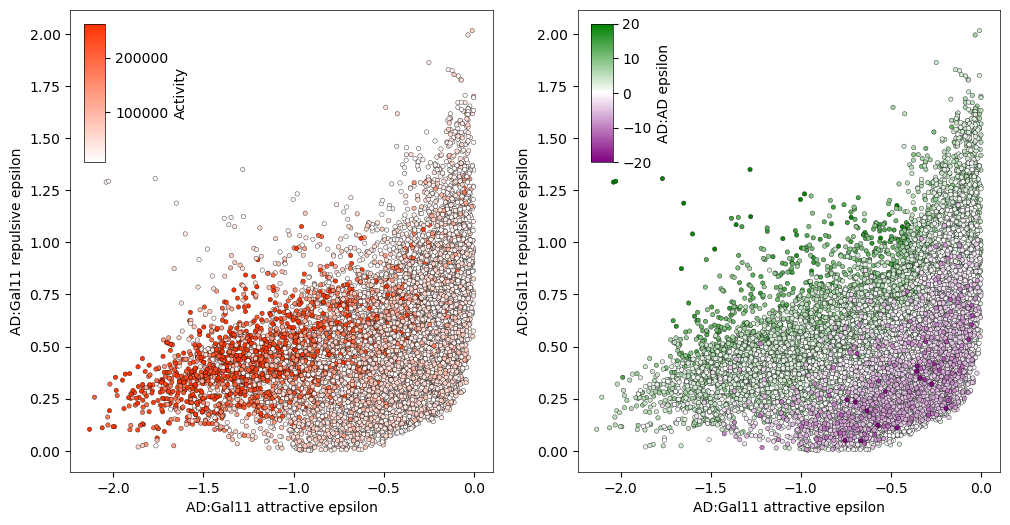

In [8]:
# Plot the interactions, colored by activity and self interaction

seq_data = seq_data.sort_values("epsilon", ascending=False)
activity = seq_data["Activity_BioRepB_BYS4"]

# Colormap that goes from transparent to red
cmap = mcolors.LinearSegmentedColormap.from_list("TransparentRed", [(1, 1, 1), (1, 0.2, 0)])
norm = plt.Normalize(vmin=activity.min(), vmax=activity.max())

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Color by activity
sc1 = axs[0].scatter(
    seq_data["gal11_attractive"], 
    seq_data["gal11_repulsive"], 
    # s=norm(seq_data["Activity_BioRepB_BYS4"]) * 50,
    s=10,
    c=seq_data["Activity_BioRepB_BYS4"], 
    cmap=cmap, 
    edgecolors="black", 
    linewidth=0.25       
)

axs[0].set_xlabel("AD:Gal11 attractive epsilon")
axs[0].set_ylabel("AD:Gal11 repulsive epsilon")

cax = inset_axes(axs[0], width="5%", height="30%", loc="upper left", borderpad=1)
plt.colorbar(sc1, cax=cax, orientation="vertical", label="Activity")

# Colormap from purple to green
cmap = mcolors.LinearSegmentedColormap.from_list("PurpleWhiteGreen", ["purple", "white", "green"])

# Normalize the color scale with zero centered, so white represents zero
max_val = max(abs(seq_data["epsilon"].min()), abs(seq_data["epsilon"].max()))
norm =  plt.Normalize(vmin=-20, vmax=20)

# Second plot: Color by tile self-interaction
sc1 = axs[1].scatter(
    seq_data["gal11_attractive"], 
    seq_data["gal11_repulsive"], 
    # s=norm(seq_data["epsilon"]) * 20,  # Scale size based on color values
    s=10,
    c=seq_data["epsilon"], 
    cmap=cmap, 
    norm=norm,
    edgecolors="black",  # Black outline
    linewidth=0.25        # Adjust outline thickness
)

axs[1].set_xlabel("AD:Gal11 attractive epsilon")
axs[1].set_ylabel("AD:Gal11 repulsive epsilon")

cax = inset_axes(axs[1], width="5%", height="30%", loc="upper left", borderpad=1)
plt.colorbar(sc1, cax=cax, orientation="vertical", label="AD:AD epsilon")

# plt.tight_layout()
plt.show()
